In [48]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import numpy as np
import time
from graph_utils import *

In [16]:
def make_ritual_graph(df):
    '''Used for the ritual graphs and gender ones'''
    g = nx.Graph()
    for i in df.index:
        m1 = df.loc[i, 'dyad'].split("-")[0]
        m2 = df.loc[i, 'dyad'].split("-")[1]
        if not (g.has_edge(m1, m2)):
            g.add_edge(m1, m2, weight=1) # we could add attribute of magn of which games happened 
        else:
            g[m1][m2]['weight'] += 1
    return g

In [17]:
df_prox_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="proximity_rituals")
df_rqi_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="rqi_rituals")
df_coalitions_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="coalitions_rituals")
df_ritual_details = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="ritual_details")
df_ritual_details = df_ritual_details[df_ritual_details['dyad'].notna()]
df_census_fl = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="censusFL")

/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed

In [18]:
df_census_fl.MONKEY.nunique()-6 #6 that died too young
df_prox_rituals.ritualcount.sum() == df_ritual_details.shape[0] #Total rituals documented equals each unique ritual, consistent data

True

In [19]:
print(f"Number of dyadic pairs \n{df_ritual_details['dyad  type'].value_counts()}")
print("\nSex dist. of group, ignore ?s (they all died) and subtract 1 from the male count")
df_census_fl["sex"].value_counts() # minus 1 male

Number of dyadic pairs 
ff    177
mm    164
fm     98
mf      7
Name: dyad  type, dtype: int64

Sex dist. of group, ignore ?s (they all died) and subtract 1 from the male count


m    28
f    20
?     5
Name: sex, dtype: int64

True
Size : (659, 10)
Keystone: ('MI', 0.052302688692085104)


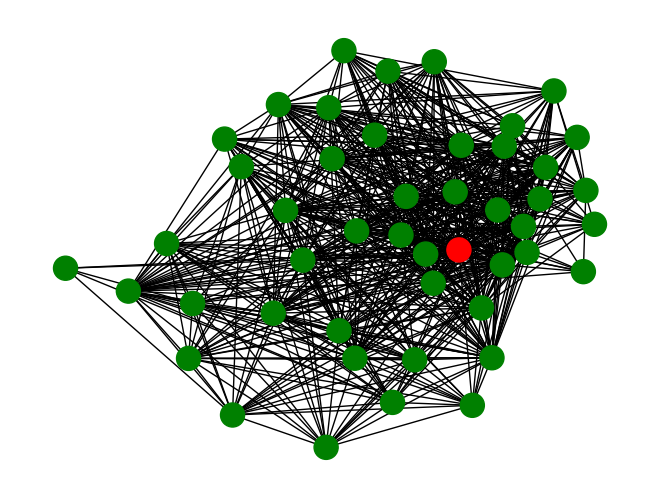

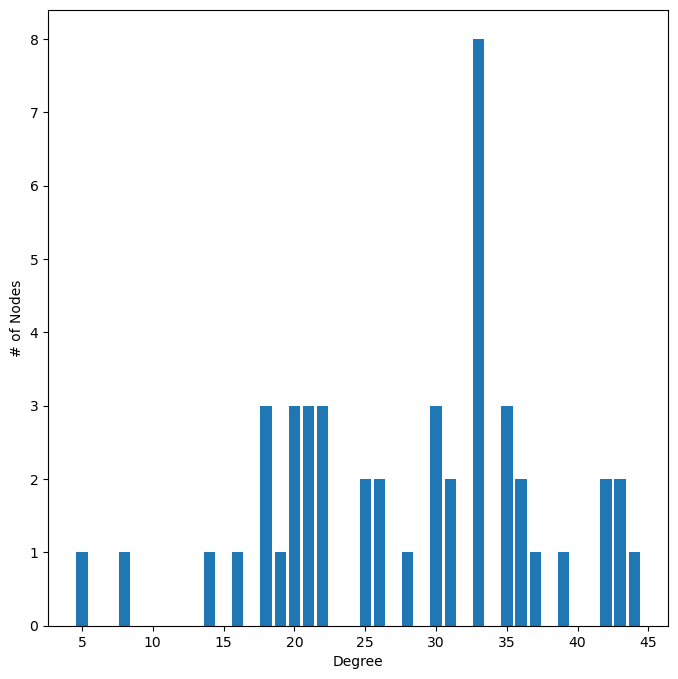

3.6151711378353375
nodes: 47


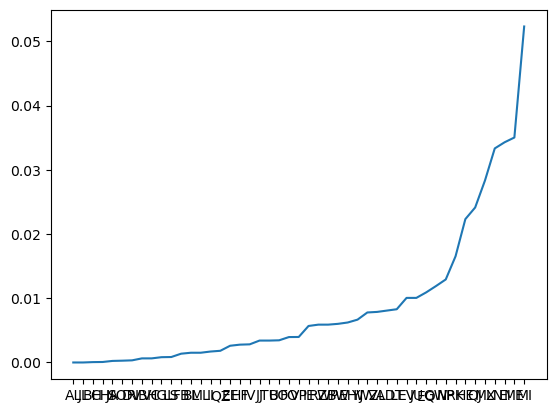

In [75]:
plt.rcdefaults()
# No rituals or nodes lost when we drop zero SRI rows
prox_df = df_prox_rituals[df_prox_rituals["SRI"] != 0]
print(prox_df.m1.nunique() == df_prox_rituals.m1.nunique())
prox_df.ritualcount.value_counts() == df_prox_rituals.ritualcount.value_counts()

prox_g = nx.Graph()
node_colors = []
for i in prox_df.index:
    m1 = prox_df.loc[i, 'm1']
    m2 = prox_df.loc[i, 'm2']
    prox_g.add_edge(m1, m2, weight=prox_df.loc[i, 'SRI'])
keystone = max(nx.betweenness_centrality(prox_g).items(), key=lambda x: x[1])
color_map = ['red' if node == keystone[0] else 'green' for node in prox_g]    

print(f"Size : {prox_df.shape}")

print(f"Keystone: {keystone}")
nx.draw(prox_g, node_color = color_map)
degree_distribution(prox_g)
print(avg_path_length(prox_g))
print (f"nodes: {nx.number_of_nodes(prox_g)}")

cent_dict = nx.betweenness_centrality(prox_g)

myList = sorted(cent_dict.items(), key=lambda x:x[1])
x, y = zip(*myList) 

plt.plot(x, y)

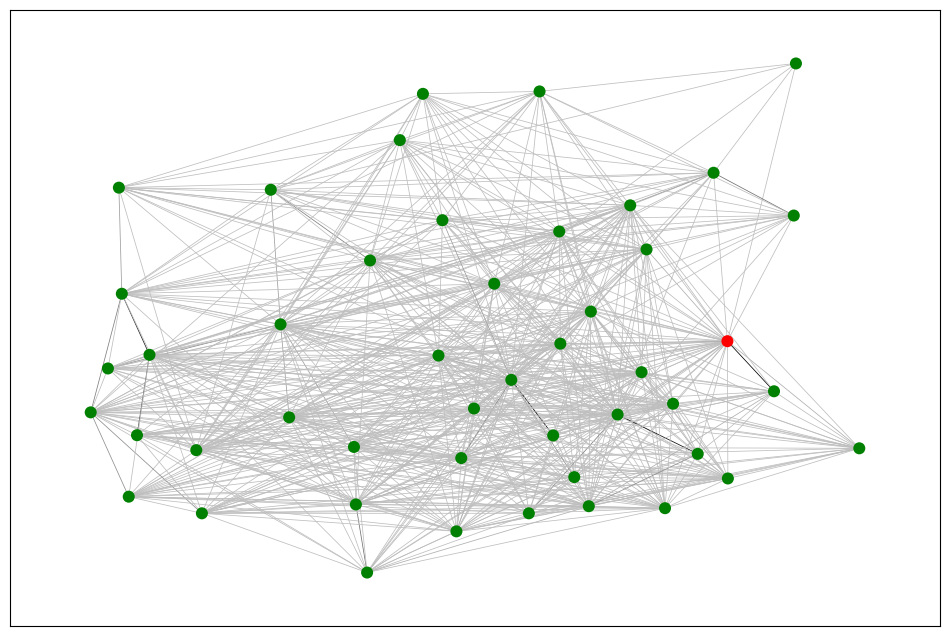

<Figure size 640x480 with 0 Axes>

In [107]:
#Make the prox graph reptty
widths = nx.get_edge_attributes(prox_g, 'weight')
nodelist = prox_g.nodes()

plt.figure(figsize=(12,8))

# pos = nx.spring_layout(prox_g)
# nx.draw_networkx_nodes(prox_g,pos,
#                        nodelist=nodelist,
#                        node_size=1000,
#                        node_color=color_map,
#                        alpha=0.7)
# nx.draw_networkx_edges(prox_g,pos,
#                        edgelist = widths.keys(),
#                        width=[val*10 for val in list(widths.values())],
#                        edge_color='black',
#                        alpha=0.75)

edges,weights = zip(*nx.get_edge_attributes(prox_g,'weight').items())
cmap = plt.cm.Greys(np.linspace(0,1,20)) # Getting color map as a matrix of colors to reinterpolate
# c = cmap[5:]
# print(c)
# print("Normal\n", cmap)
cmap = cl.ListedColormap(cmap[7:])

node_options = {"node_color": color_map, "node_size": 75, "linewidths": 0, "cmap": plt.cm.viridis}
edge_options = {"width": 0.55, "edge_color": weights, "edge_cmap": cmap}
pos = nx.spring_layout(prox_g, seed=13)  # Seed for reproducible layout
nx.draw_networkx_nodes(prox_g, pos, **node_options)
nx.draw_networkx_edges(prox_g, pos, **edge_options)

# plt.box(False)
plt.show()
plt.savefig("plot.png", dpi=1000)


In [22]:
deg_view = prox_g.degree()
degs = []
for item in deg_view:
    degs.append(item[1])
nodes = prox_g.nodes()

zipped = zip(nodes,temp)
zipped = sorted(zipped, key=lambda y: y[1])
x, y = [], []
for i, j in zipped:
    x.append(i)
    y.append(j)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [12, 3.50]
plt.title("Degrees per Node")
plt.plot(x,y)

NameError: name 'temp' is not defined

Size : (202, 10)
Keystone: ('QJ', 0.07609873701178048)


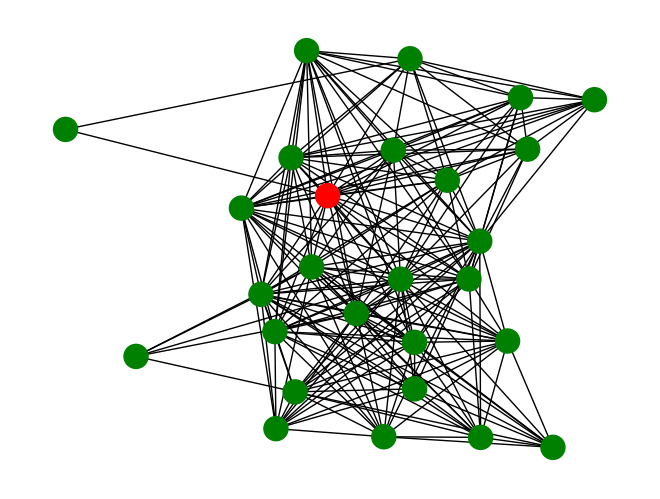

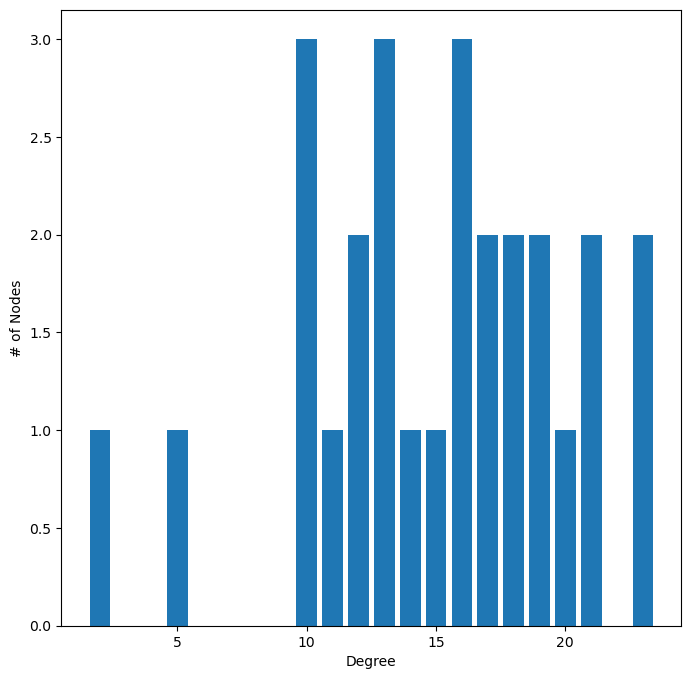

3.339031339031339


27

In [9]:
plt.rcdefaults()
male_df_prox = prox_df[prox_df["m1"].map(lambda x : df_census_fl[df_census_fl.MONKEY == x].sex.iloc[0] == 'm')]
male_df_prox = male_df_prox[male_df_prox["m2"].map(lambda x : df_census_fl[df_census_fl.MONKEY == x].sex.iloc[0] == 'm')]
print(f"Size : {male_df_prox.shape}")

male_prox_g = nx.Graph()
node_colors = []
for i in male_df_prox.index:
    m1 = male_df_prox.loc[i, 'm1']
    m2 = male_df_prox.loc[i, 'm2']
    male_prox_g.add_edge(m1, m2, weight=male_df_prox.loc[i, 'SRI'])
keystone = max(nx.betweenness_centrality(male_prox_g).items(), key=lambda x: x[1])
color_map = ['red' if node == keystone[0] else 'green' for node in male_prox_g]    

print(f"Keystone: {keystone}")
nx.draw(male_prox_g, node_color = color_map)
degree_distribution(male_prox_g)
print(avg_path_length(male_prox_g))
nx.number_of_nodes(male_prox_g)

Size : (125, 10)
Keystone: ('MI', 0.08666341780376868)


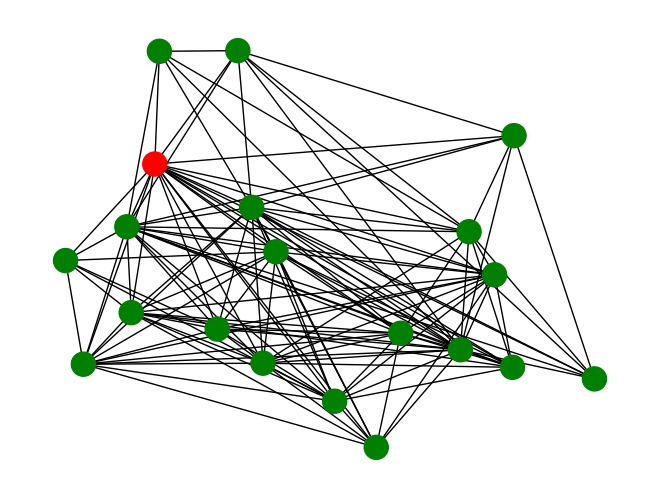

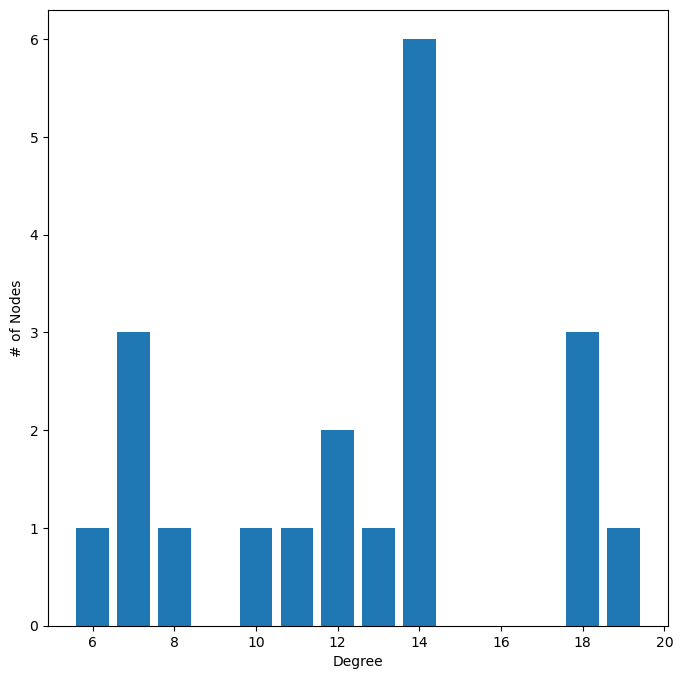

3.0631578947368423


20

In [10]:
# Female prox graph
plt.rcdefaults()
female_df_prox = prox_df[prox_df["m1"].map(lambda x : df_census_fl[df_census_fl.MONKEY == x].sex.iloc[0] == 'f')]
female_df_prox = female_df_prox[female_df_prox["m2"].map(lambda x : df_census_fl[df_census_fl.MONKEY == x].sex.iloc[0] == 'f')]
print(f"Size : {female_df_prox.shape}")
female_prox_g = nx.Graph()
node_colors = []
for i in female_df_prox.index:
    m1 = female_df_prox.loc[i, 'm1']
    m2 = female_df_prox.loc[i, 'm2']
    female_prox_g.add_edge(m1, m2, weight=female_df_prox.loc[i, 'SRI'])
keystone = max(nx.betweenness_centrality(female_prox_g).items(), key=lambda x: x[1])
color_map = ['red' if node == keystone[0] else 'green' for node in female_prox_g]    

print(f"Keystone: {keystone}")
nx.draw(female_prox_g, node_color = color_map)
degree_distribution(female_prox_g)
print(avg_path_length(female_prox_g))
nx.number_of_nodes(female_prox_g)

In [11]:
df_rituals_with_females = df_ritual_details[df_ritual_details["dyad  type"].map( lambda x : x in ["ff", "mf", "fm"])]
df_rituals_with_females.reset_index(inplace=True)

df_rituals_only_females = df_ritual_details[df_ritual_details["dyad  type"].map( lambda x : x == "ff")]
df_rituals_only_females.reset_index(inplace=True)


df_rituals_with_males = df_ritual_details[df_ritual_details["dyad  type"].map( lambda x : x in ["mm", "mf", "fm"])]
df_rituals_with_males.reset_index(inplace=True)

df_rituals_only_males = df_ritual_details[df_ritual_details["dyad  type"].map( lambda x : x == "mm")]
df_rituals_only_males.reset_index(inplace=True)

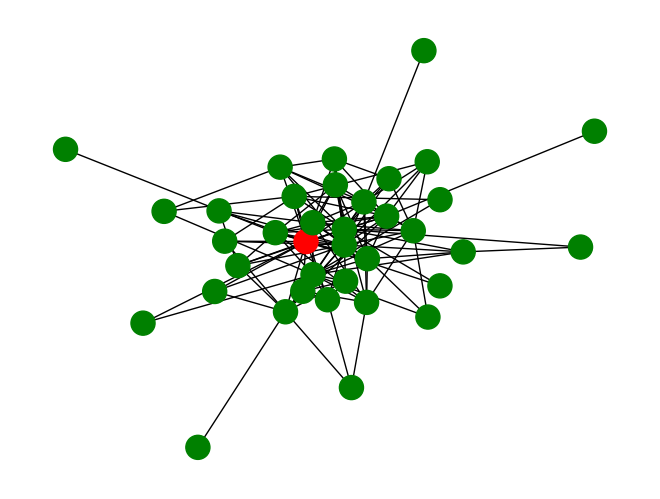

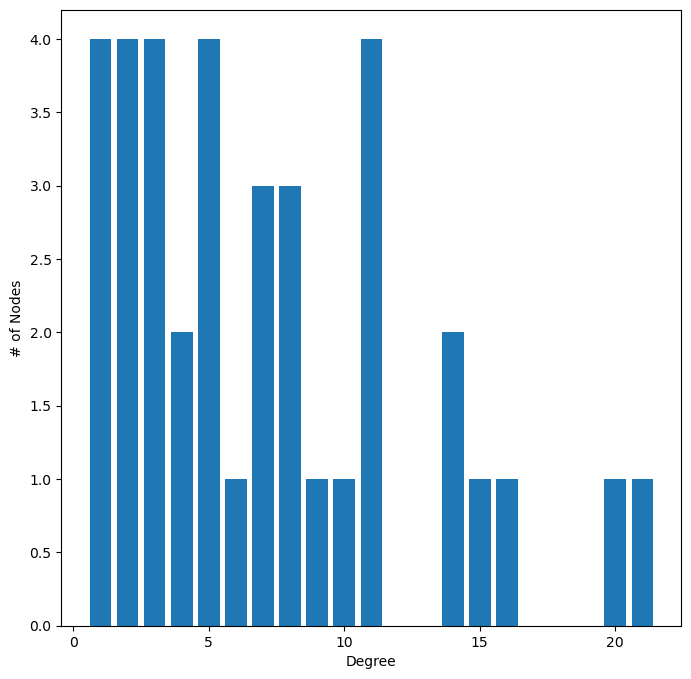

 All Rituals avg path length 3.346096096096096
All Rituals # of Nodes: 37


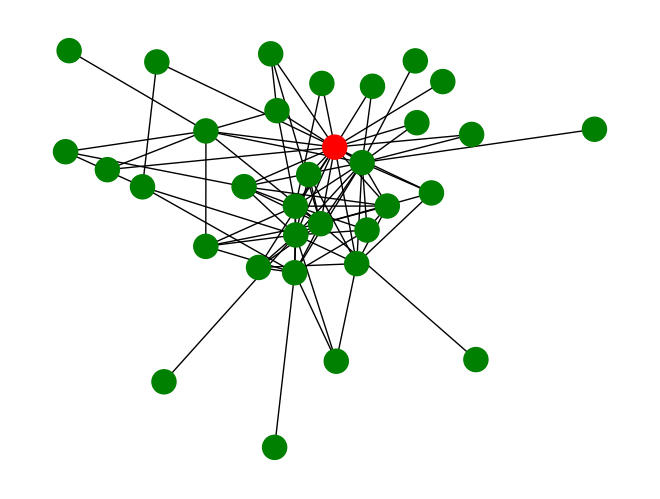

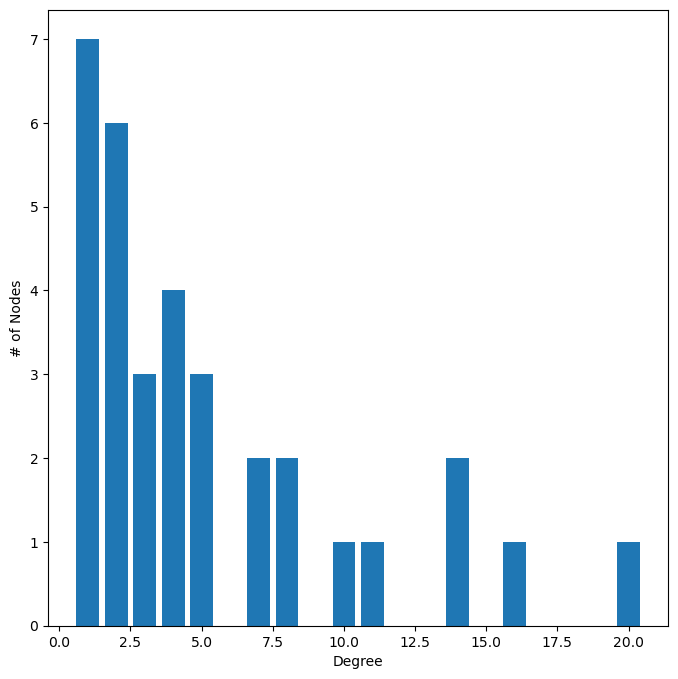

 Has Females Rituals avg path length 3.472537878787879
Has Females # of Nodes: 33


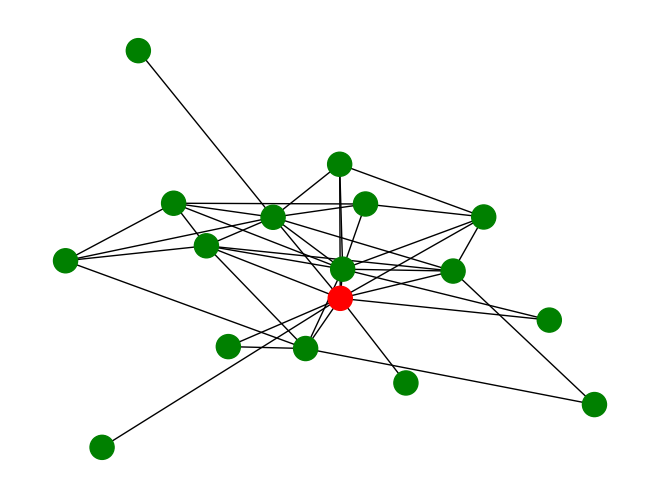

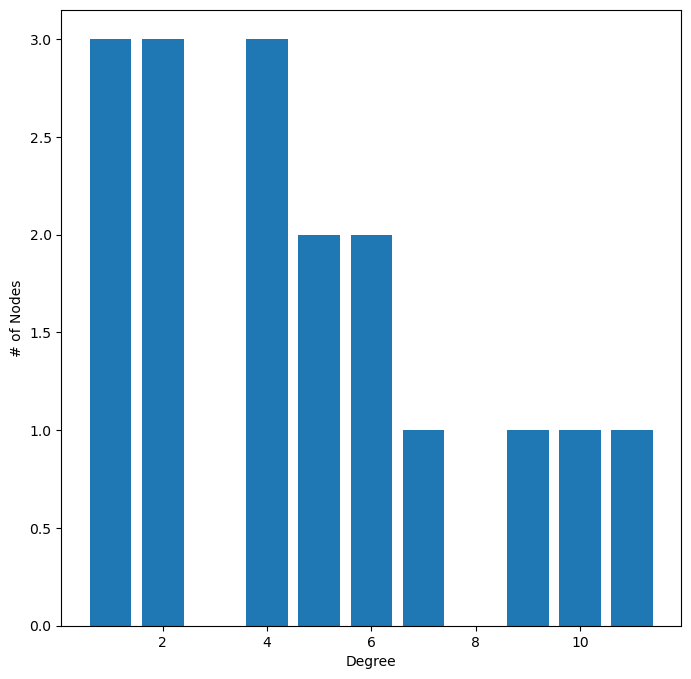

 Only female avg path length 3.2463235294117645
Only female # of Nodes: 17


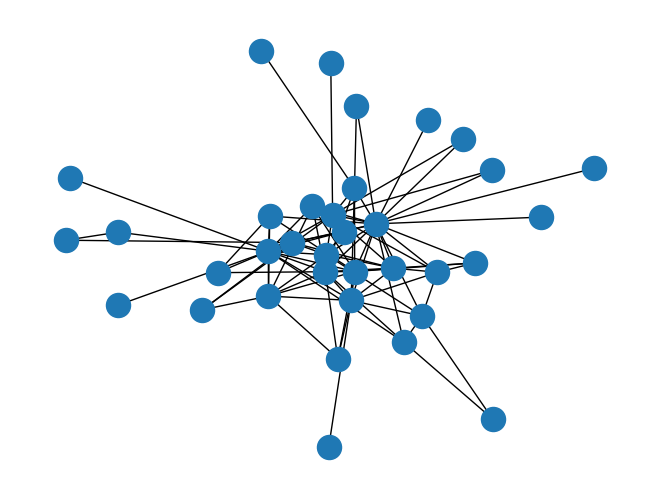

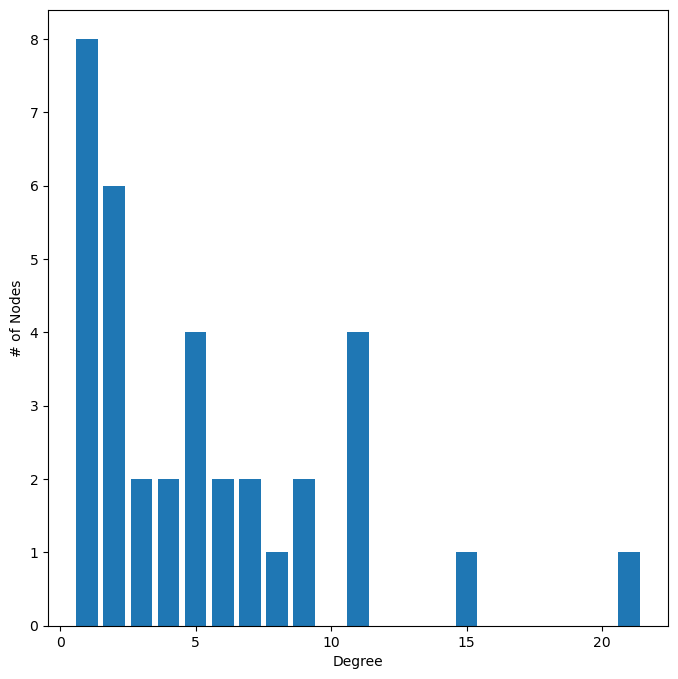

 Has Males avg path length 3.569747899159664
Has Males # of Nodes: 35


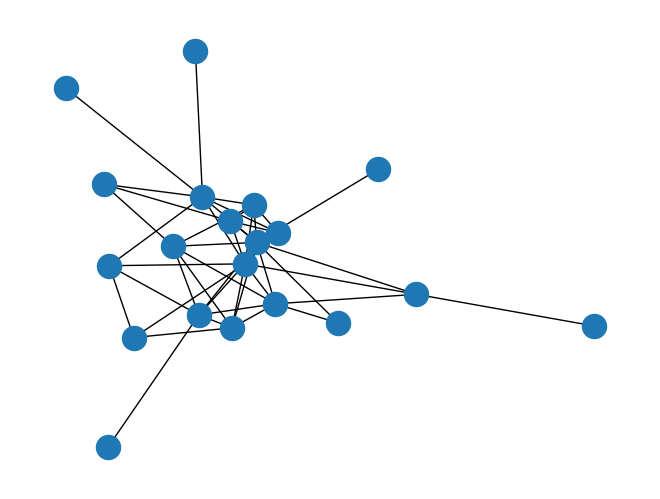

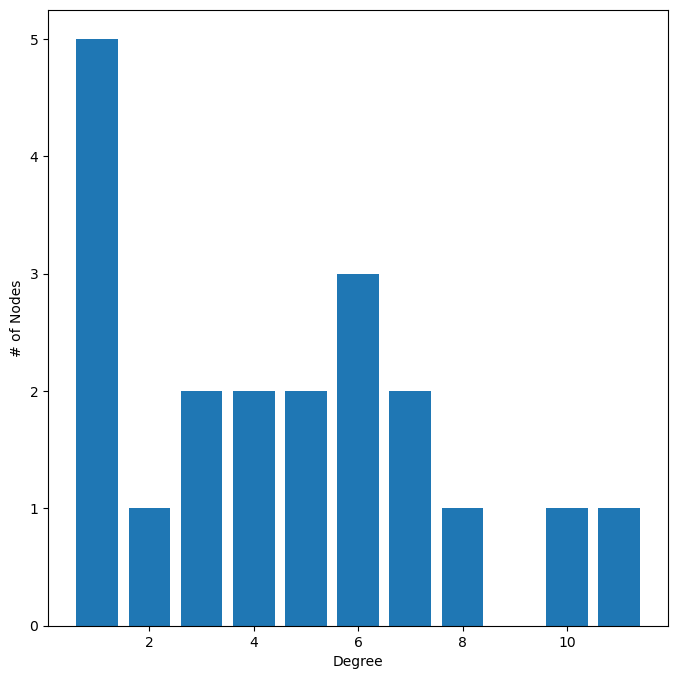

 Only Males avg path length 3.4263157894736844
Only Males # of Nodes: 20


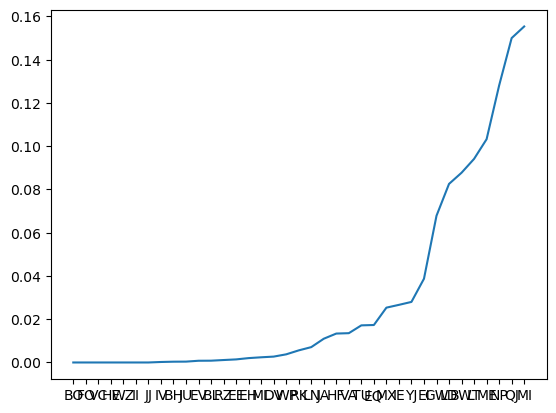

In [12]:
plt.rcdefaults()
ritual_g = make_ritual_graph(df_ritual_details)
color_map = ['red' if node == 'MI' else 'green' for node in ritual_g]
nx.draw(ritual_g, node_color = color_map)

degree_distribution(ritual_g)
print(f" All Rituals avg path length {avg_path_length(ritual_g)}")
print(f"All Rituals # of Nodes: {nx.number_of_nodes(ritual_g)}")

female_ritual_g = make_ritual_graph(df_rituals_with_females)
color_map = ['red' if node == 'MI' else 'green' for node in female_ritual_g]
nx.draw(female_ritual_g, node_color = color_map)
degree_distribution(female_ritual_g)
print(f" Has Females Rituals avg path length {avg_path_length(female_ritual_g)}")
print(f"Has Females # of Nodes: {nx.number_of_nodes(female_ritual_g)}")

only_female_ritual_g = make_ritual_graph(df_rituals_only_females)
color_map = ['red' if node == 'MI' else 'green' for node in only_female_ritual_g]
nx.draw(only_female_ritual_g, node_color = color_map)
degree_distribution(only_female_ritual_g)
print(f" Only female avg path length {avg_path_length(only_female_ritual_g)}")
print(f"Only female # of Nodes: {nx.number_of_nodes(only_female_ritual_g)}")

male_ritual_g = make_ritual_graph(df_rituals_with_males)
nx.draw(male_ritual_g)
degree_distribution(male_ritual_g)
print(f" Has Males avg path length {avg_path_length(male_ritual_g)}")
print(f"Has Males # of Nodes: {nx.number_of_nodes(male_ritual_g)}")

only_male_ritual_g = make_ritual_graph(df_rituals_only_males)
nx.draw(only_male_ritual_g)
degree_distribution(only_male_ritual_g)
print(f" Only Males avg path length {avg_path_length(only_male_ritual_g)}")
print(f"Only Males # of Nodes: {nx.number_of_nodes(only_male_ritual_g)}")

cent_dict = nx.betweenness_centrality(ritual_g)

myList = sorted(cent_dict.items(), key=lambda x:x[1])
x, y = zip(*myList) 

plt.plot(x, y)

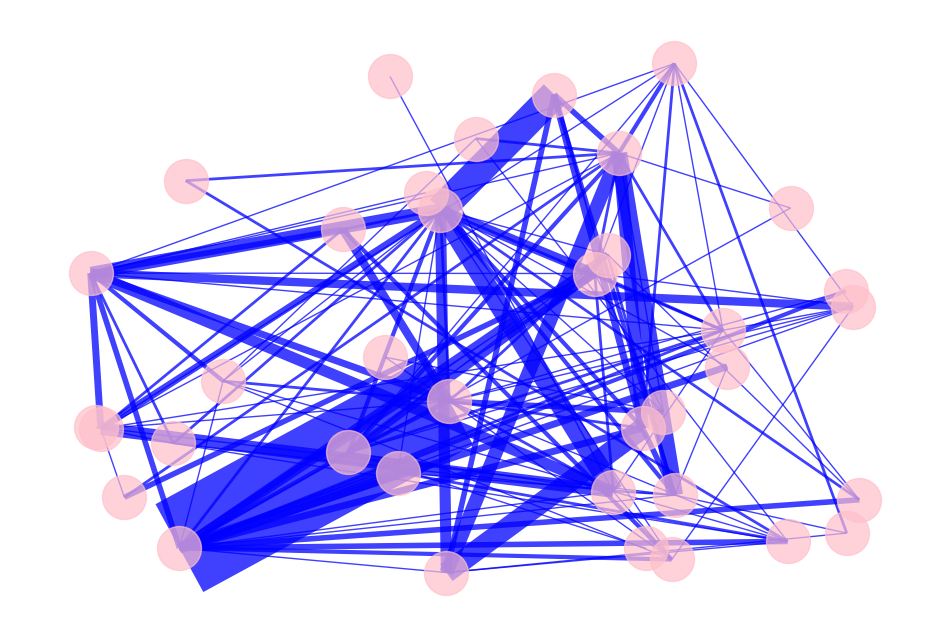

In [13]:
#Make the full ritual reptty
widths = nx.get_edge_attributes(ritual_g, 'weight')
nodelist = ritual_g.nodes()

plt.figure(figsize=(12,8))

pos = nx.random_layout(ritual_g)
nx.draw_networkx_nodes(ritual_g,pos,
                       nodelist=nodelist,
                       node_size=1000,
                       node_color="pink",
                       alpha=0.7)
nx.draw_networkx_edges(ritual_g,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.75)
plt.box(False)
plt.show()

In [61]:
print("Nodes that never did a ritual")
for n in prox_g.nodes(): 
    if n not in ritual_g.nodes(): 
        print(f"{n} : {prox_g.degree[n]}")

Nodes that never did a ritual
AL : 5
JL : 16
FB : 21
IB : 20
QZ : 26
CHI : 8
VP : 25
HGL : 18
SOR : 14
LS : 22


In [62]:
ritual_cent = nx.betweenness_centrality(ritual_g)
ritual_keystones = []
for i in range(8):
    keystone = max(ritual_cent.items(), key=lambda x: x[1])
    ritual_cent.pop(keystone[0])
    ritual_keystones.append(keystone)
prox_keystones = []
prox_cent = nx.betweenness_centrality(prox_g)
for i in range(8):
    keystone = max(prox_cent.items(), key=lambda x: x[1])
    prox_cent.pop(keystone[0])
    prox_keystones.append(keystone)

print("Ritual Keystones\t\tProximity Keystones")
for i,j in zip(ritual_keystones, prox_keystones): 
    print(f"{i} : {j}")

Ritual Keystones		Proximity Keystones
('MI', 0.15537153898973569) : ('MI', 0.052302688692085104)
('QJ', 0.1500131046570675) : ('ME', 0.03501837884329042)
('NP', 0.128068358949494) : ('EI', 0.0342747770907002)
('ME', 0.10325034187164735) : ('LN', 0.03332085357799021)
('LT', 0.09414558378457097) : ('MX', 0.02832442995355474)
('BW', 0.08773949409410343) : ('QJ', 0.02412582506829493)
('LD', 0.08257086037299839) : ('HE', 0.022317969893701304)
('GW', 0.06784719716726044) : ('RK', 0.01653561098173672)


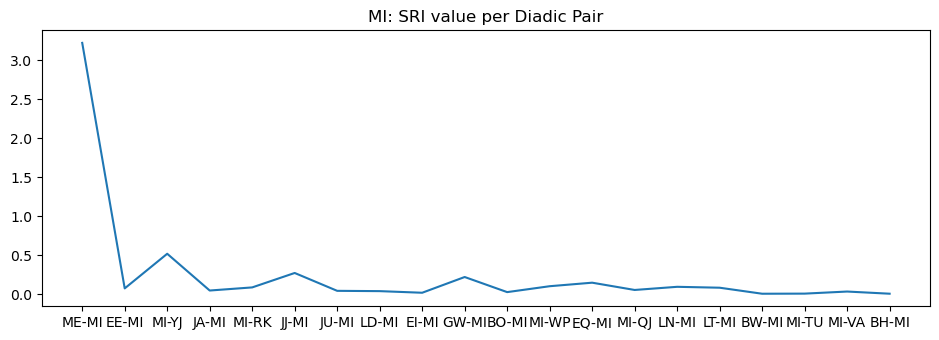

MI dyad  type value counts
ff    103
fm     26
mf      3
Name: dyad  type, dtype: int64
MI finger in or on nose sum 112.0
MI finger in mouth sum 87.0
MI toy game sum 0.0
MI hair game sum 0.0
MI game_other sum 0.0
MI eyepoke sum 1.0
MI dental_exam sum 0.0
MI backwhack sum 0.0
MI suck_chew_kiss sum 1.0
MI handholding sum 1.0


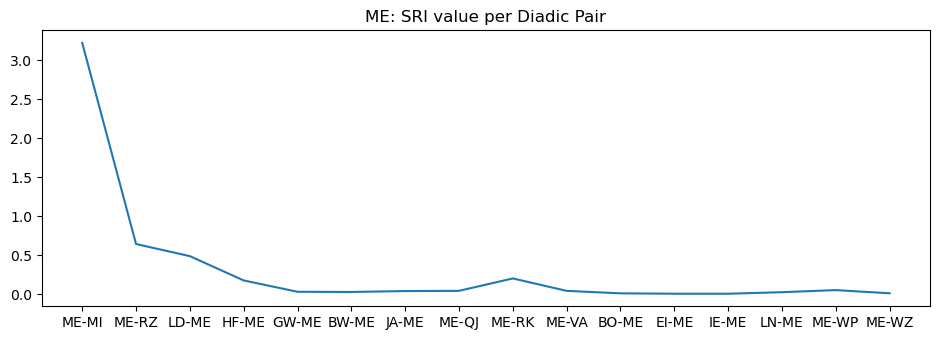

ME dyad  type value counts
ff    92
fm    11
mf     3
Name: dyad  type, dtype: int64
ME finger in or on nose sum 90.0
ME finger in mouth sum 61.0
ME toy game sum 0.0
ME hair game sum 0.0
ME game_other sum 0.0
ME eyepoke sum 3.0
ME dental_exam sum 0.0
ME backwhack sum 0.0
ME suck_chew_kiss sum 1.0
ME handholding sum 0.0


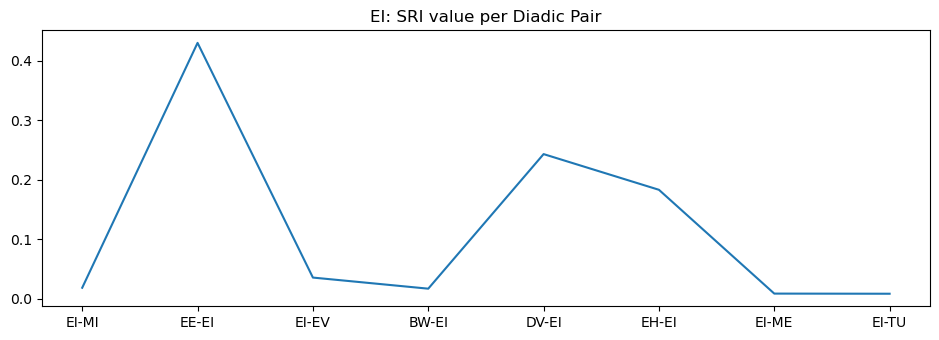

EI dyad  type value counts
ff    10
fm     3
Name: dyad  type, dtype: int64
EI finger in or on nose sum 7.0
EI finger in mouth sum 6.0
EI toy game sum 0.0
EI hair game sum 0.0
EI game_other sum 0.0
EI eyepoke sum 0.0
EI dental_exam sum 3.0
EI backwhack sum 0.0
EI suck_chew_kiss sum 2.0
EI handholding sum 0.0


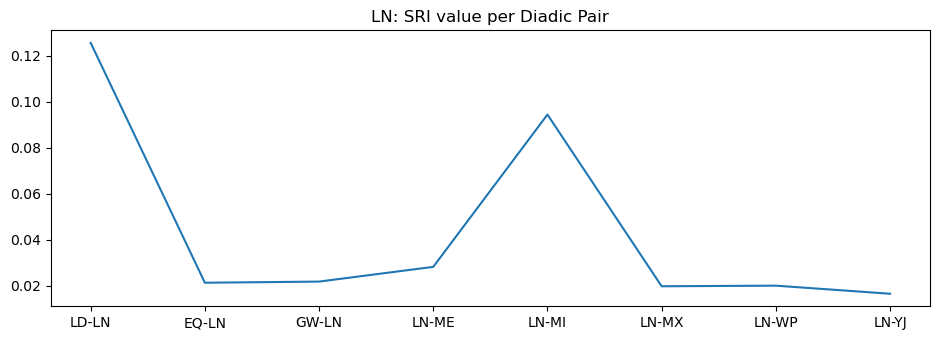

LN dyad  type value counts
ff    9
fm    3
mf    1
Name: dyad  type, dtype: int64
LN finger in or on nose sum 6.0
LN finger in mouth sum 5.0
LN toy game sum 0.0
LN hair game sum 0.0
LN game_other sum 0.0
LN eyepoke sum 3.0
LN dental_exam sum 2.0
LN backwhack sum 1.0
LN suck_chew_kiss sum 0.0
LN handholding sum 0.0


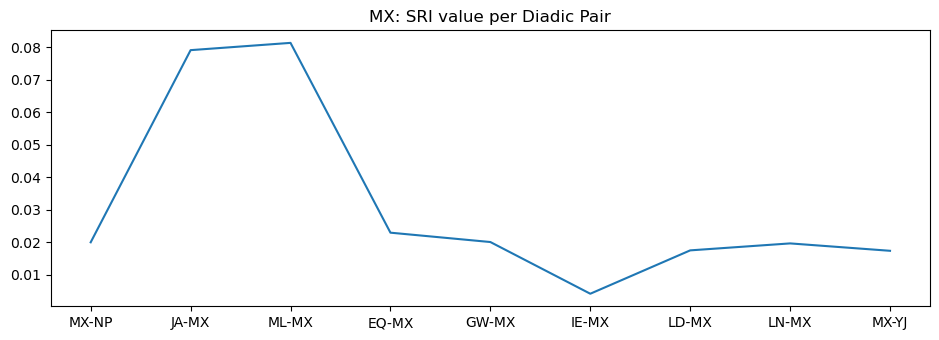

MX dyad  type value counts
mm    10
fm     3
Name: dyad  type, dtype: int64
MX finger in or on nose sum 0.0
MX finger in mouth sum 3.0
MX toy game sum 5.0
MX hair game sum 0.0
MX game_other sum 2.0
MX eyepoke sum 1.0
MX dental_exam sum 2.0
MX backwhack sum 1.0
MX suck_chew_kiss sum 0.0
MX handholding sum 0.0


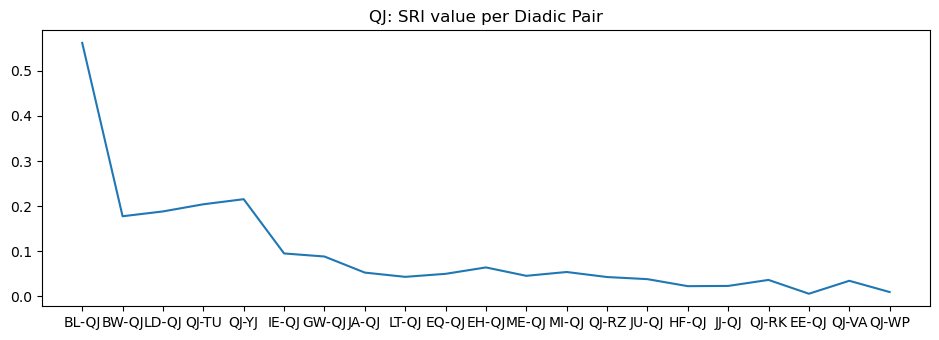

QJ dyad  type value counts
mm    51
fm    40
Name: dyad  type, dtype: int64
QJ finger in or on nose sum 21.0
QJ finger in mouth sum 60.0
QJ toy game sum 18.0
QJ hair game sum 10.0
QJ game_other sum 1.0
QJ eyepoke sum 11.0
QJ dental_exam sum 15.0
QJ backwhack sum 0.0
QJ suck_chew_kiss sum 7.0
QJ handholding sum 2.0


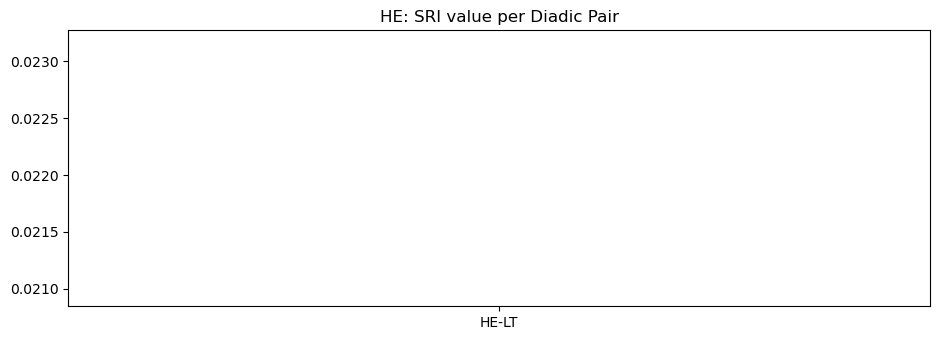

HE dyad  type value counts
mm    1
Name: dyad  type, dtype: int64
HE finger in or on nose sum 0.0
HE finger in mouth sum 1.0
HE toy game sum 0.0
HE hair game sum 0.0
HE game_other sum 0.0
HE eyepoke sum 0.0
HE dental_exam sum 0.0
HE backwhack sum 0.0
HE suck_chew_kiss sum 0.0
HE handholding sum 0.0


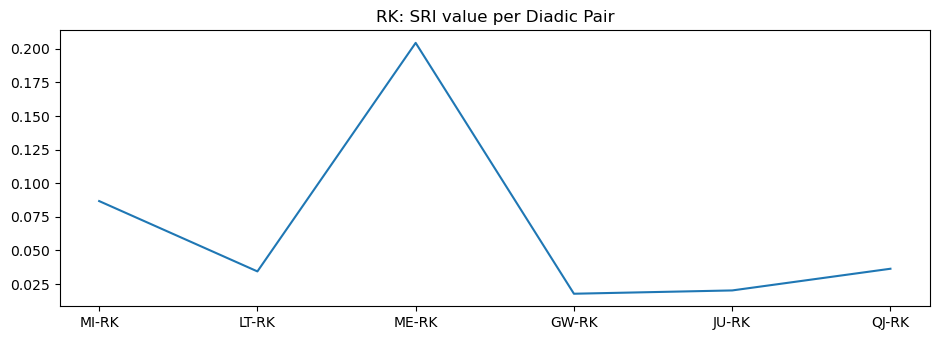

RK dyad  type value counts
fm    7
mm    5
Name: dyad  type, dtype: int64
RK finger in or on nose sum 7.0
RK finger in mouth sum 6.0
RK toy game sum 0.0
RK hair game sum 0.0
RK game_other sum 0.0
RK eyepoke sum 1.0
RK dental_exam sum 2.0
RK backwhack sum 0.0
RK suck_chew_kiss sum 0.0
RK handholding sum 0.0


In [63]:
# Proxmimty Keystone's Rituals
key_dfs = []
for key, value in prox_keystones: 
    key_df = df_ritual_details[df_ritual_details["dyad"].map(lambda x : x == key+x[2:] or x == x[:3]+key)]
    key_dfs.append((key, key_df))

plt.rcParams["figure.figsize"] = [9.50, 3.50]
plt.rcParams["figure.autolayout"] = True
for key, df in key_dfs: 
    for col in df: 
        match col: 
            case "dyad":
                plt.title(f"{key}: dyad")
                #plt.plot(df[col].value_counts())
                temp = []
                for edge,count in zip(df[col].value_counts().index, df[col].value_counts()):
                    temp.append(prox_g[edge.split('-')[0]][edge.split('-')[1]]['weight'] * count)
                plt.title(f"{key}: SRI value per Diadic Pair")
                plt.plot(pd.Series(data=temp, index=df[col].value_counts().index))
                plt.show()
            case "dyad  type":
                print(f"{key} {col} value counts\n{df[col].value_counts()}")
            case "timedate_start":
                continue
            case "comments regarding further details":
                continue
            case _:
                print(f"{key} {col} sum {df[col].sum()}")
    time.sleep(.5)

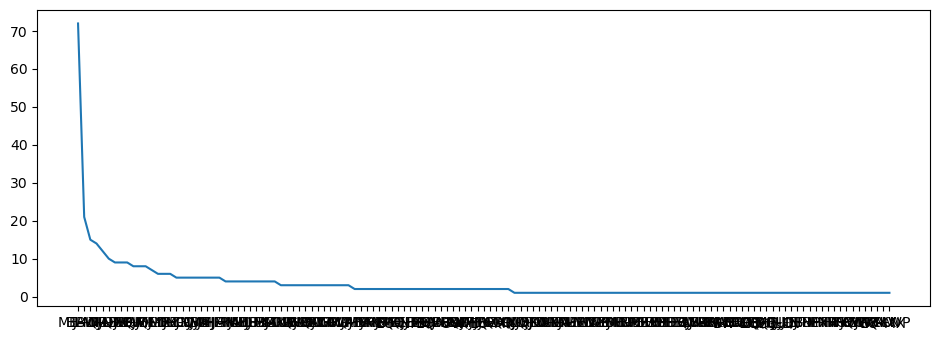

In [64]:
plt.plot(df_ritual_details.dyad.value_counts())